<a href="https://colab.research.google.com/github/matthewrenteria/Visualizacion-de-datos-2022/blob/main/Proyecto_1_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Visualización de datos, 1era entrega

El objetivo del ejercicio es aplicar el proceso de diseño de visualización de datos basados en el framework de Tamara con la base departamental de Colombia acerca del puntaje que obtuvieron los estudiantes en las pruebas saber grado quinto.

# Integrantes: 

1.   Matthew Rentería Guzmán
2.   Natali Hernández Cardozo 




In [ ]:
pip install altair vega_datasets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
import plotnine as pn 
from vega_datasets import data

In [ ]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
sns.set(rc={'figure.figsize':(20,8.6)}) #Todas las visualizaciones con ese tamaño

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Casos_positivos_de_COVID-19_en_Colombia.csv', 
                 sep = ',', low_memory=False,
                 index_col=0,
                dtype={
                      'ID de caso': str
                     })
base.head()

,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
fecha reporte web,,,,,,,,,,,,,,,,,,,,,,
2021-03-04 00:00:00,"2,265,685",2021-03-02 00:00:00,11,BOGOTA,"11,001",BOGOTA,49,1,M,Comunitaria,Casa,Leve,NaN,NaN,Recuperado,2021-02-25 00:00:00,NaN,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6.0,NaN
2021-03-04 00:00:00,"2,265,686",2021-03-02 00:00:00,11,BOGOTA,"11,001",BOGOTA,49,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,2021-02-23 00:00:00,NaN,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6.0,NaN
2021-03-04 00:00:00,"2,265,687",2021-03-02 00:00:00,11,BOGOTA,"11,001",BOGOTA,51,1,F,Comunitaria,Casa,Leve,NaN,NaN,Recuperado,2021-02-24 00:00:00,NaN,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6.0,NaN
2021-03-04 00:00:00,"2,265,688",2021-03-02 00:00:00,11,BOGOTA,"11,001",BOGOTA,51,1,F,Relacionado,Casa,Leve,NaN,NaN,Recuperado,2021-02-27 00:00:00,NaN,2021-03-03 00:00:00,2021-03-13 00:00:00,Tiempo,6.0,NaN
2021-03-04 00:00:00,"2,265,689",2021-03-02 00:00:00,11,BOGOTA,"11,001",BOGOTA,51,1,F,Comunitaria,Casa,Leve,NaN,NaN,Recuperado,2021-03-01 00:00:00,NaN,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6.0,NaN


Fuente: https://www.datos.gov.co/widgets/gt2j-8ykr?mobile_redirect=true

In [ ]:
base.dtypes

ID de caso                       object
Fecha de notificación            object
Código DIVIPOLA departamento     object
Nombre departamento              object
Código DIVIPOLA municipio        object
Nombre municipio                 object
Edad                              int64
Unidad de medida de edad          int64
Sexo                             object
Tipo de contagio                 object
Ubicación del caso               object
Estado                           object
Código ISO del país              object
Nombre del país                  object
Recuperado                       object
Fecha de inicio de síntomas      object
Fecha de muerte                  object
Fecha de diagnóstico             object
Fecha de recuperación            object
Tipo de recuperación             object
Pertenencia étnica              float64
Nombre del grupo étnico          object
dtype: object

# ****Mapa de calor:****

In [ ]:
base2 = base[base['Nombre departamento']=="BOGOTA"]

In [ ]:
base2["Tipo de contagio"].value_counts()

Comunitaria    865915
Relacionado    601514
En estudio     292685
Importado         939
Name: Tipo de contagio, dtype: int64

In [ ]:
base2["Edad"].value_counts()

26     43293
30     43176
27     43125
28     42683
29     42518
       ...  
114        2
108        1
109        1
110        1
111        1
Name: Edad, Length: 111, dtype: int64

In [ ]:
tab1 = pd.crosstab(base2["Edad"],base2["Tipo de contagio"])
tab1

Tipo de contagio,Comunitaria,En estudio,Importado,Relacionado
Edad,,,,
1,2591,2978,3,3120
2,2241,1955,2,3083
3,2052,1372,0,3109
4,2301,1065,0,3353
5,2328,1122,2,3715
...,...,...,...,...
108,1,0,0,0
109,0,0,0,1
110,0,0,0,1


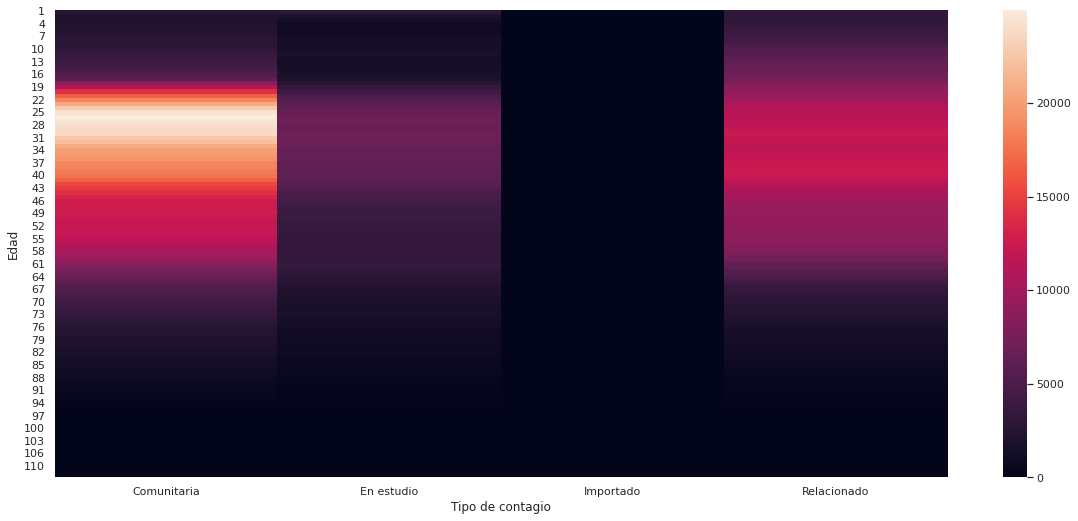

In [ ]:
ax = sns.heatmap(tab1)

**What?:**
Se observa que las variables que se están utlizando son cualitativas, por otro lado se sabe que la gráfica estápresentada en datos espaciales, y su  información es estática. 


---



---


**Why?:**
El objetivo de está gráfica es indicar de acuerdo al tipo de contagio en que 
edad es más frecuente desarrollar esta enfermedad COVID-19.


---



---


**How?:**
El como se va hacer es a través del contraste de colores entre claros y oscurecidos. En donde los colores oscuros indican una menor frecuencia del evento. Y los claros su opuesto. 


---



---


**Marcas y canales:**
Marca de línea con canal de posición horizontal para el atributo Tipo de contagio. Y el vertical para la edad.  
Canal de color. 


---


---




**Análisis de gráfica:**
Se escogieron las variables de tipo de contagio y de edad, debido a que nos permite plantearnos posibles escenarios del porque los contagios ocurren con mayor frecuencia en ciertos intervalos de edad, así mismo permite relacionarlos para la planificación de ideas para la prevención de estos.



---



---


#***Barras***

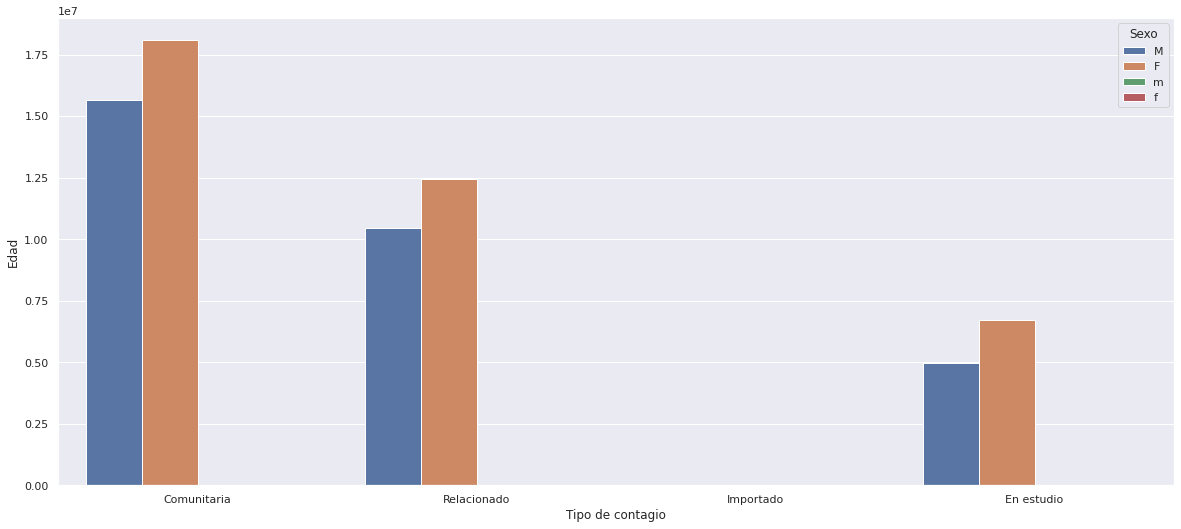

In [ ]:
sns.barplot(data = base2,
            estimator = sum,
            x = "Tipo de contagio", 
            y = "Edad",
            hue = "Sexo",
            ci = None)

**What?:**

Es un dato de tabla donde los tipos de variables que se están usando son cuantitativos y su información es estática. 

---



---



**Why?:**

Busca comparar  de acuerdo al sexo y al tipo de contagio cual es la edad más frecuente en la que se desarrolla la enfermedad. El porque se quiere mostrar la visualización de esta manera es relativamente sencillo mostrar la distribución de está enfermedad en la población. 

---



---



**Marcas y canales:**

Se usa marca de línea con canal de posición vertical, con canal de color para diferenciar el género y con canal de tamaño para diferenciar la edad. 

---



---



**Análisis de la gráfica**

La descripción de los datos en está gráfica es diferenciar según tipo de contagio y sexo cuál es la edad en el que se desarrollo la enfermedad. 

---



---



**Gráfico de dispersión:**

In [ ]:
import matplotlib.pyplot as plt

tab2 = base2['Sexo'].value_counts().rename_axis('label').reset_index(name='counts')
tab2

,label,counts
0,F,951759
1,M,809282
2,m,6
3,f,6


In [ ]:
tab3 = base2['Tipo de contagio'].value_counts().rename_axis('label').reset_index(name='counts')
tab3

,label,counts
0,Comunitaria,865915
1,Relacionado,601514
2,En estudio,292685
3,Importado,939


In [ ]:
tab4 = base2['Estado'].value_counts().rename_axis('label').reset_index(name='counts')
tab4

,label,counts
0,Leve,1718208
1,Fallecido,29323
2,leve,6265
3,Moderado,1045
4,Grave,312


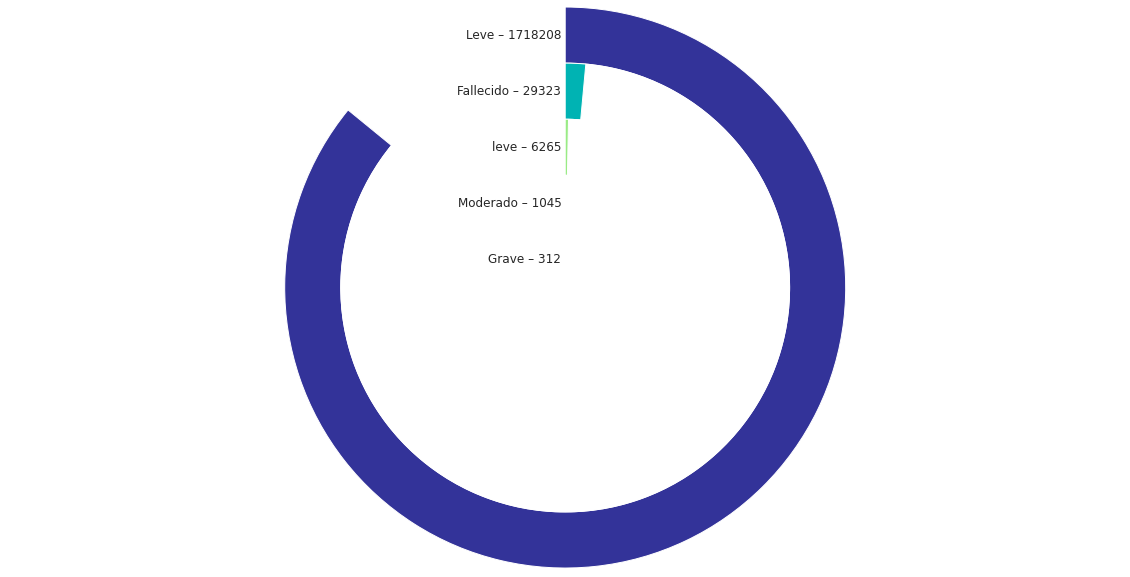

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10


labels = tab4['label']
data = tab4['counts']
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)


#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 


#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], 
                           data[i]], 
                          radius = r - i * w, 
                          startangle = 90, 
                          labels = ["", labels[i]], 
                          labeldistance = 1 - 1 / (1.5 * (n - i)), 
                          textprops = {"alpha": 0}, 
                          colors = ["white", colors[i]])
    plt.setp(innerring, 
             width = w, 
             edgecolor = "white")
    radius = r - i * w
    plt.text(0, radius - w / 2, f'{labels[i]} – {data[i]} ', ha='right', va='center')
    
#plt.legend()
plt.show()

**What?:**

Los atributos concluyen que es una gráfca espacial, la disponibilidad en los datos es estática. Y el tipo de datos ue se está utilizando es de tipo atributos; cualitativas para el conteo del estado en el que se encontraban las personas y cuantitativa cantidad de personas en esos estados.

---

---

**Why?:**

El porque se selecciono este tipo de gráfica para la visualización de estos datos, permite contrastar la proporción entre cada uno de los casos, identificando la cantidad de personas que se encuentran en cada estado.

---



---


**Marcas y canales:**
Es marca de area con canal de color para cada uno de los estados de los individuos afectados. 
Canal de posición en ambas direcciones; vertical y horizontal.
Canal de tamaño para el estado de los individuos. 


---



---



**Análisis del gráfico**

Está gráfica de rosca busca comparar el estado de la enfermedad con el total de la población. Determinando ciertos criterios bajo la gravedad de la salud de la persona, busca la construcción de conocimiento e información para la ciudadanía, acerca de la situación en salud y sus determinantes, con el fin de contribuir de manera positiva al mantenimiento y mejoramiento del estado de salud de los individuos y sus comunidades.

---



---



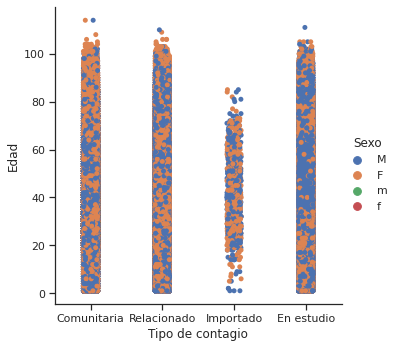

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
g = sns.catplot(x="Tipo de contagio", y="Edad", hue="Sexo", data=base2)

**What?:**

El tipo de información que se maneja en este gráfico es un cluster espacial con datos estáticos, donde sus atributos son categóricos para el tipo de contagio y cualitativo para la variable edad. 

---



---


**Why?:**

Localizar datos atípico según genero y la edad, además comparar las tendencias en las quqe se presentaron los contagios debido al sexo de la persona. Explorar la edad en la que el contagio presento mayor frecuencia de enfermedad covid-19.

---



---



**Marcas y canales:**

Marca de punto para el genero y marca de lineas para los tipos de contagio. Los canales que se implementaron para el genero de la pesona es canal de color. Y tanto vertical como horizontal para la edad. Canal de tamaño para el tipo de contagio. 

---



---



**Análisis del gráfico**

Se puede observar que la intención del gráfico recopilar, analizar y difundir información de la salud de los contagiados, generar canales de comunicación para fomentar cuidados en la salud dado el genero y sexo. Conocer los factores de riesgo que inciden en la salud de las personas.Identificar cuales podrían ser óptimas soluciones para las personas que se encuentran en avanzada edad y presenan esta enfermedad. 

---



---

